In [54]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [55]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [56]:
# Read the data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [57]:
# Combine data
merge_df = pd.merge(mouse_metadata, study_results, how ="left", on ="Mouse ID")

In [58]:
# Display data
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id_data = merge_df.loc[merge_df['Mouse ID'] =='g989']
duplicate_mouse_id_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_dup_df = merge_df.loc[~merge_df["Mouse ID"].isin(duplicate_mouse_id)]
remove_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = remove_dup_df['Mouse ID'].nunique()
clean_mice_data

248

# Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

means = remove_dup_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = remove_dup_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = remove_dup_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = remove_dup_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = remove_dup_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

drug_regimen = pd.DataFrame({"Mean Tumor Volume (mm3)": means,
                             "Median Tumor Volume (mm3)": median,
                             "Variance Tumore Volume (mm3)": variance,
                             "Standard Deviation Tumor Volume (mm3)": std,
                             "Standard Error Tumor Volume (mm3)": SEM})
drug_regimen

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumore Volume (mm3),Standard Deviation Tumor Volume (mm3),Standard Error Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_regimen_aggregate = remove_dup_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
drug_regimen_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

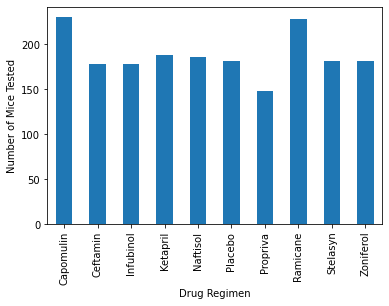

In [80]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
micepertreatment = remove_dup_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
drug_treatment = micepertreatment.plot.bar(x=["Drug Regimen"], ylabel="Number of Mice Tested")
drug_treatment

Text(0, 0.5, 'Number of Mice Tested')

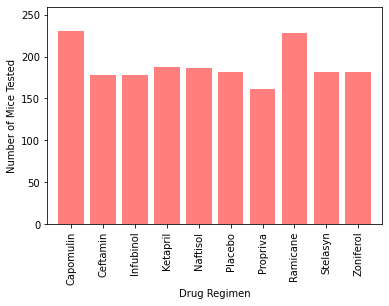

In [79]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = np.array(merge_df.groupby(["Drug Regimen"]).count()['Mouse ID'])
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color = 'red', alpha = 0.5, align = 'center')
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation='vertical')                            
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Drug Regimen")                            
plt.ylim(0, max(x_axis)+250)
plt.ylabel("Number of Mice Tested")

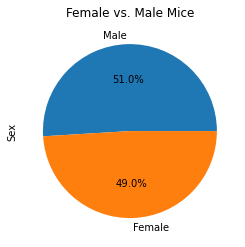

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = remove_dup_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

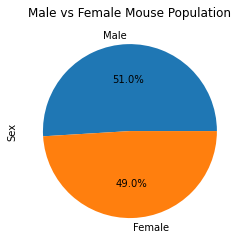

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

# Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = remove_dup_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
second_merge_df = pd.merge(last_timepoint , remove_dup_df, on=(["Mouse ID","Timepoint"]))
second_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_regimen = second_merge_df.loc[second_merge_df["Drug Regimen"] == treatment]
    tumor_vol= treatment_regimen['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    lower_bound0 = lowerq0 - (1.5*IQR0)
    upper_bound0 = upperq0 + (1.5*IQR0)

    lower_bound1 = lowerq1 - (1.5*IQR1)
    upper_bound1 = upperq1 + (1.5*IQR1)

    lower_bound2 = lowerq2 - (1.5*IQR2)
    upper_bound2 = upperq2 + (1.5*IQR2)

    lower_bound3 = lowerq3 - (1.5*IQR3)
    upper_bound3 = upperq3 + (1.5*IQR3)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
        
    
#Print values 
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")

NameError: name 'lowerq0' is not defined